<a href="https://colab.research.google.com/github/sarahkim430/Python_sideprojects/blob/main/Starwars_miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Starwars mini project

*   Data from Starwars API([SWAP](https://swapi.dev/)) shows the characteristics of the characters in Star Wars.
*   Data from: https://dplyr.tidyverse.org/reference/starwars.html



##1. First look at data

In [7]:
# Import packages needed for this project 
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn') # graph preferences 
sns.set(font_scale=1)

import warnings # ignoring errors
warnings.simplefilter(action='ignore', category=FutureWarning)

In [8]:
# Mount google drive
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Import data
sw = pd.read_csv('/content/drive/MyDrive/Colab_git/Starwars.csv')

In [10]:
sw.head(5)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human



<Column list>   
* name 
* height
* mass
* hair_color  
* skin_color
* eye_color
* birth_year
* sex
* gender
* homeworld
* species

* categorical variables: 
               name, hair_color, skin_color, eye_color, sex, gender, homeworld, species
* numerical variables: 
               height, mass, birth_year

In [11]:
sw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        87 non-null     object 
 1   height      81 non-null     float64
 2   mass        59 non-null     float64
 3   hair_color  82 non-null     object 
 4   skin_color  87 non-null     object 
 5   eye_color   87 non-null     object 
 6   birth_year  43 non-null     float64
 7   sex         83 non-null     object 
 8   gender      83 non-null     object 
 9   homeworld   77 non-null     object 
 10  species     83 non-null     object 
dtypes: float64(3), object(8)
memory usage: 7.6+ KB


In [12]:
# descriptive statistics of numerical data
sw.describe()

,height,mass,birth_year
count,81.000000,59.000000,43.000000
mean,174.358025,97.311864,87.565116
std,34.770429,169.457163,154.691439
min,66.000000,15.000000,8.000000
25%,167.000000,55.600000,35.000000
50%,180.000000,79.000000,52.000000
75%,191.000000,84.500000,72.000000
max,264.000000,1358.000000,896.000000


In [13]:
# descriptive statistics of categorical data
sw.describe(include=np.object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,name,hair_color,skin_color,eye_color,sex,gender,homeworld,species
count,87,82,87,87,83,83,77,83
unique,87,12,31,15,4,2,48,37
top,Luke Skywalker,none,fair,brown,male,masculine,Naboo,Human
freq,1,37,17,21,60,66,11,35


In [14]:
# Find unique elements of each categorical variable 
print('Hair colour: ', sw['hair_color'].unique())
print('Skin colour: ', sw['skin_color'].unique())
print('Eye colour: ', sw['eye_color'].unique())
print('Sex: ', sw['sex'].unique())
print('Gender: ', sw['gender'].unique())
print('Homeworld: ', sw['homeworld'].unique())
print('Species: ', sw['species'].unique())

Hair colour:  ['blond' nan 'none' 'brown' 'brown, grey' 'black' 'auburn, white'
 'auburn, grey' 'white' 'grey' 'auburn' 'blonde' 'unknown']
Skin colour:  ['fair' 'gold' 'white, blue' 'white' 'light' 'white, red' 'unknown'
 'green' 'green-tan, brown' 'pale' 'metal' 'dark' 'brown mottle' 'brown'
 'grey' 'mottled green' 'orange' 'blue, grey' 'grey, red' 'red' 'blue'
 'grey, green, yellow' 'yellow' 'tan' 'fair, green, yellow' 'grey, blue'
 'silver, red' 'green, grey' 'red, blue, white' 'brown, white' 'none']
Eye colour:  ['blue' 'yellow' 'red' 'brown' 'blue-gray' 'black' 'orange' 'hazel' 'pink'
 'unknown' 'red, blue' 'gold' 'green, yellow' 'white' 'dark']
Sex:  ['male' 'none' 'female' 'hermaphroditic' nan]
Gender:  ['masculine' 'feminine' nan]
Homeworld:  ['Tatooine' 'Naboo' 'Alderaan' 'Stewjon' 'Eriadu' 'Kashyyyk' 'Corellia'
 'Rodia' 'Nal Hutta' 'Bestine IV' nan 'Kamino' 'Trandosha' 'Socorro'
 'Bespin' 'Mon Cala' 'Chandrila' 'Endor' 'Sullust' 'Cato Neimoidia'
 'Coruscant' 'Toydaria' 'Mala

In [15]:
# Briefly organize and print data content
print("Total number of data: ", sw.shape[0]*sw.shape[1])
print("Total missing values: {} = {:.2f}% of the entire data".format(sw.isnull().sum().sum(), (sw.isnull().sum().sum()*100)/(sw.shape[0]*sw.shape[1])))
print("Number of Starwars characters: ", sw['name'].nunique())
print("Number of Starwars species: ", sw['species'].nunique())

Total number of data:  957
Total missing values: 105 = 10.97% of the entire data
Number of Starwars characters:  87
Number of Starwars species:  37


##2. Things we want to find out
* What is the gender ratio of Star Wars characters?
* What is the distribution of character height by gender?
* Which character is the heaviest and the lightest?
* Does the height and weight of the Star Wars character correlate?

##3. Data Pre-processing

###3-1.Missing Vaules 

In [16]:
# Find columns with NULL
sw.isnull().any(axis=0)
# columns with missing values: height, mass, type, x, y 

name          False
height         True
mass           True
hair_color     True
skin_color    False
eye_color     False
birth_year     True
sex            True
gender         True
homeworld      True
species        True
dtype: bool

In [17]:
# Find the number of missing values per each column
sw.isnull().sum()

name           0
height         6
mass          28
hair_color     5
skin_color     0
eye_color      0
birth_year    44
sex            4
gender         4
homeworld     10
species        4
dtype: int64

In [18]:
# For hair color, sex, gender, homeworld and species, it's different for each person so meaningless to add values.
# For height and mass, make missing values equal to 0. 
sw['height'].fillna(0, inplace=True)
sw['mass'].fillna(0, inplace=True)
sw.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human


In [19]:
# For sex, there exist 'none' and NaN
print(sw[sw['sex'] == 'none'])
print(sw[sw['sex'].isnull()])

      name  height   mass hair_color   skin_color  eye_color  birth_year  \
1    C-3PO   167.0   75.0        NaN         gold     yellow       112.0   
2    R2-D2    96.0   32.0        NaN  white, blue        red        33.0   
7    R5-D4    97.0   32.0        NaN   white, red        red         NaN   
21   IG-88   200.0  140.0       none        metal        red        15.0   
72  R4-P17    96.0    0.0       none  silver, red  red, blue         NaN   
84     BB8     0.0    0.0       none         none      black         NaN   

     sex     gender homeworld species  
1   none  masculine  Tatooine   Droid  
2   none  masculine     Naboo   Droid  
7   none  masculine  Tatooine   Droid  
21  none  masculine       NaN   Droid  
72  none   feminine       NaN   Droid  
84  none  masculine       NaN   Droid  
              name  height  mass hair_color skin_color eye_color  birth_year  \
36        Ric Oli?   183.0   0.0      brown       fair      blue         NaN   
39   Quarsh Panaka   183.0 

In [20]:
# if sex = none, species = Droid so replace with 'robot'
sw['sex'][(sw['sex'] == 'none')] = 'robot'
print('Sex: ', sw['sex'].unique())

Sex:  ['male' 'robot' 'female' 'hermaphroditic' nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


##4.EDA & Visualization

###4-1. Gender ratio of Starwars Characters

In [21]:
sw['sex'].value_counts()
sw['gender'].value_counts()

masculine    66
feminine     17
Name: gender, dtype: int64

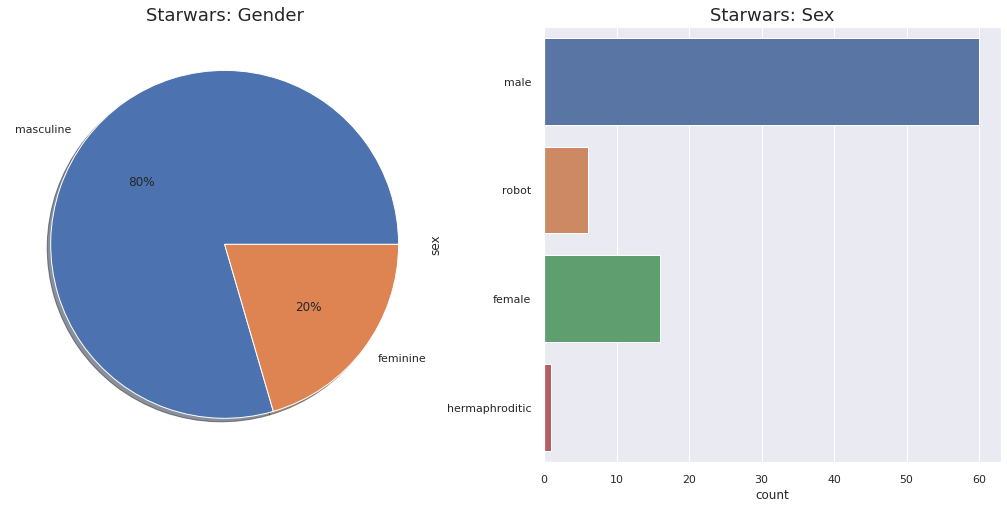

In [22]:
f, ax = plt.subplots(1, 2, figsize=(18, 8)) 

sw['gender'].value_counts().plot.pie(ax=ax[0], autopct='%1.0f%%', shadow=True) # pie graph
ax[0].set_title('Starwars: Gender', size=18) # title 
ax[0].set_ylabel('') #delete y label

#sns.countplot
#shows the counts of observations in each categorical bin using bars
# horizontal chart : map your variable to the y-axis
sns.countplot(y='sex', data=sw, ax=ax[1])
ax[1].set_title('Starwars: Sex', size=18) #title

plt.show()

###4-2. Distribution of character height by gender

In [23]:
sw['height'].describe()

count     87.000000
mean     162.333333
std       55.671726
min        0.000000
25%      164.000000
50%      178.000000
75%      190.500000
max      264.000000
Name: height, dtype: float64

In [24]:
#skewness and kurtosis
#Skewness(왜도): measure of asymmetry
#Kurtosis(첨도): easure of whether the data are heavy-tailed or light-tailed
#               : kurtosis of a normal distribution = 0
print("Skewness: %f" % sw['height'].skew())
print("Kurtosis: %f" % sw['height'].kurt())
# Both values fall into the acceptable range of skewness and kurtosis.

Skewness: -1.760878
Kurtosis: 2.927697


In [25]:
# hermaphroditic character (Jabba Desilijic Tiure) is impossible to find the probability distribution for gender
sw[sw['sex'] == 'hermaphroditic'].head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
15,Jabba Desilijic Tiure,175.0,1358.0,NaN,"green-tan, brown",orange,600.0,hermaphroditic,masculine,Nal Hutta,Hutt


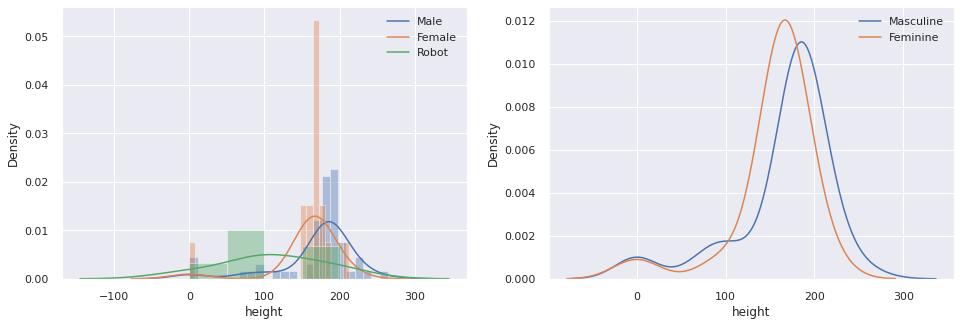

In [26]:
# plot 
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

#sns.distplot
sns.distplot(sw[sw['sex'] == 'male']['height'], ax=ax[0])
sns.distplot(sw[sw['sex'] == 'female']['height'], ax=ax[0])
sns.distplot(sw[sw['sex'] == 'robot']['height'], ax=ax[0])
ax[0].legend(['Male','Female','Robot'])

#sns.kdeplot
sns.kdeplot(sw[sw['gender'] == 'masculine']['height'], ax=ax[1])
sns.kdeplot(sw[sw['gender'] == 'feminine']['height'], ax=ax[1])
ax[1].legend(['Masculine','Feminine'])

plt.show()

###4-3. Heaviest & Lightest characters

In [27]:
# lightest character
notz = sw[sw['mass'] != 0]  # ignore characters with mass = 0
min(notz['mass'])

15.0

In [28]:
print("{}'s weight is the lightest at {}".format(notz[notz['mass'] == min(notz['mass'])]['name'].values, min(notz['mass'])))
print("{}'s weight is the heaviest at {}".format(notz[notz['mass'] == max(notz['mass'])]['name'].values, max(notz['mass'])))

['Ratts Tyerell']'s weight is the lightest at 15.0
['Jabba Desilijic Tiure']'s weight is the heaviest at 1358.0


###4-4.Comparison of Star Wars characters' weight between species

In [29]:
# Average weight per species 
weight = sw[['species', 'mass']].groupby(['species'], as_index=True).mean()
weight

,mass
species,
Aleena,15.000000
Besalisk,102.000000
Cerean,82.000000
Chagrian,0.000000
Clawdite,55.000000
Droid,46.500000
Dug,40.000000
Ewok,20.000000
Geonosian,80.000000


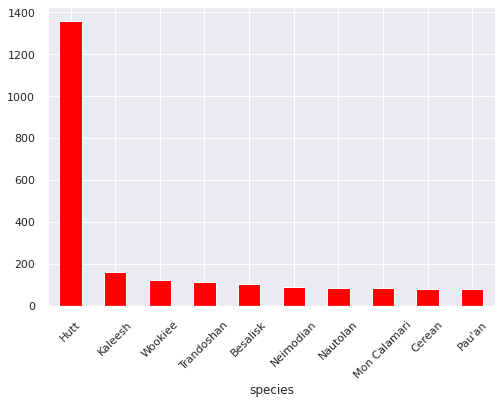

In [30]:
# Plot the top 10 species in order of weight
weight['mass'].sort_values(ascending=False).head(10).plot.bar(color='red')

plt.xticks(rotation=45)
plt.show()

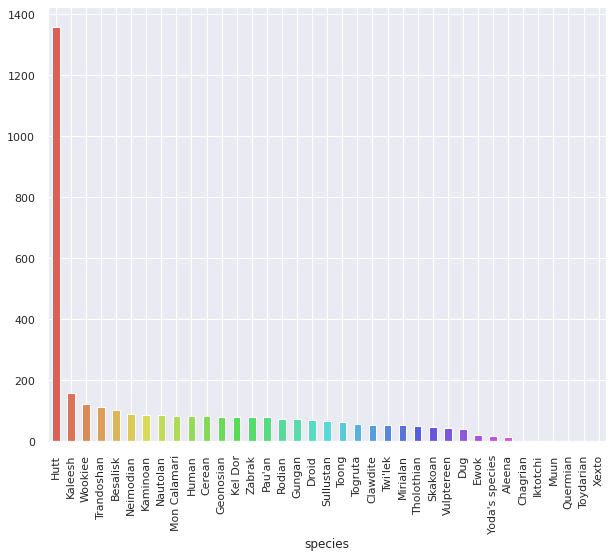

In [ ]:
# Plot all the species in order of weight
f, ax = plt.subplots(1, 1, figsize=(10, 8))

colors = sns.color_palette('hls',len(weight['mass'])) 

g = weight['mass'].sort_values(ascending=False).plot.bar(color = colors)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.show()

###4-5. Weight-height correlation of Star Wars characters

In [31]:
# Remove Hutt's weight since it's way out of the range 
# Remove characters with mass = 0 
out1 = sw['species'].isin(['Hutt'])
out2 = sw['mass'].isin(['0'])
sw[~out1][~out2].shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


(86, 11)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


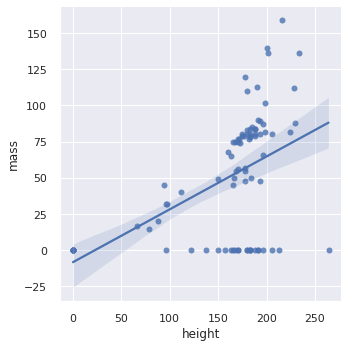

In [32]:
# Correlation plot

sns.lmplot(data=sw[~out1][~out2], x='height', y='mass')
sns.set_style(style='darkgrid')

plt.show()

##5.Conclusion

* Star Wars Data:  
Total data:  957  
Total missing values: 105 = 10.97% of the entire data   
Total characters:  87  
Total species:  37  

* Gender Ratio?  
  : masculine:feminine=8:2
* Distribution of character height by gender?  
  : Male characters are generally taller than the female, and robots are shorter than them.
* Heaviest & lightest characters?  
  : ['Ratts Tyerell']'s weight is the lightest at 15.0
    ['Jabba Desilijic Tiure']'s weight is the heaviest at 1358.0  
* Weight-height correlation?  
  : Yes, it seems to have correlation between weight and height. 